<center><h1>Spotify Song Analysis</h1></center>

<center><h2>Group Name: Harmony Insights</h2></center>

#### Team Members :
    1. Meghana Bangalore Srikantha - 002765280
    2. Diya Baldota - 002747966
    3. Pooja Kuberiah - 002725439
    4. Sanjana Karra - 002784432

#### Problem Statement
In the competitive landscape of digital music streaming, understanding what factors influence song popularity is crucial for artists, producers, and platforms like Spotify. This analysis seeks to decode the patterns in song features, streaming data, and artist popularity to predict streaming success effectively.

#### Objectives
- Data Preparation: To meticulously clean and preprocess the dataset, ensuring high data quality for accurate analysis.
- Exploratory Data Analysis (EDA): To conduct an in-depth exploration of the data to uncover underlying patterns, distributions, and relationships that influence streaming numbers.
- Feature Engineering: To develop new features that might capture the nuances of streaming dynamics more effectively.
- Predictive Modelling: To construct, apply, and fine-tune several machine learning models to forecast the number of streams a song might receive.
- Model Evaluation: To critically assess the performance of each model, utilizing metrics such as R-squared and Mean Squared Error, and optimize them to improve prediction accuracy.

#### Goal
The ultimate goal of this notebook is to provide actionable insights that can help stakeholders in the music streaming industry—ranging from content creators to marketing professionals—understand and leverage the elements that enhance song popularity on Spotify. By achieving a deeper understanding of these factors, the analysis aims to aid in the strategic planning of song releases and promotional efforts to maximize engagement and streaming success on the platform.

# 1. Importing necessary libraries 

In [1]:
# Linear algebra operations
import numpy as np 

# Used for data preparation
import pandas as pd 

# Used for data visualization
import plotly.express as px 
import plotly.graph_objects as go
import seaborn as sns 
import matplotlib.pyplot as plt
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots
import plotly.express as px

# Used for wordcloud 
import re
from wordcloud import WordCloud

# Used for machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor


# 2. Data Loading and Pre-processing

In [2]:
#Loading the "Spotify" dataset
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')

In [3]:
# Displaying the first few rows of the dataset
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
# Getting summary statistics of dataset
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [6]:
# Checking for unique values in all columns
df.nunique()

track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 949
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

First we will have to remove one anomaly for this dataset. The track 'Love Grows (Where my rosemary grows)' has its stream count unfortunately be its musical characteristics. Since we are unable to get the stream count for this row we will be omitting this row from our comparison.

In [7]:
df = df.drop(index = 574)

In [8]:
# Combining 'released_year', 'released_month', 'released_day' to get 'release_date' for a common date format
df['released_date'] = pd.to_datetime(df['released_year'].astype(str) + '-' +
                        df['released_month'].astype(str) + '-' +
                        df['released_day'].astype(str), errors='coerce')

# Dropping the original year, month, and day columns
df.drop(['released_year', 'released_month', 'released_day'], axis=1, inplace=True)

In [9]:
# Displaying the first few rows of the dataset
df.head()

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,...,A,Minor,65,23,80,14,63,11,6,2023-05-18


In [10]:
# To convert categorical data in the 'mode' column into numerical representation
# One-hot encoding the 'mode' column
mode_dummies = pd.get_dummies(df['mode'], prefix='mode')

# Concatenate the new columns with the original DataFrame
df = pd.concat([df, mode_dummies], axis=1)

# You can drop the original 'mode' column
df.drop('mode', axis=1, inplace=True)

In [11]:
# Replacing null values in 'key' column into -1
df['key'] = df['key'].fillna(-1)

# Replacing invalid data in the 'stream' column into null
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [12]:
# transfering keys into numeric datatype
key_num = {
    'C':0,
    'C#':1,
    'D':2,
    'D#':3,
    'E':4,
    'F':5,
    'F#':6,
    'G':7,
    'G#':8,
    'A':9,
    'A#':10,
    'B':11
}

df['key'] = df['key'].map(key_num).fillna(-1)
df['key'].head()

0    11.0
1     1.0
2     5.0
3     9.0
4     9.0
Name: key, dtype: float64

In [13]:
# Dropping the null value in the 'streams' column
df = df.dropna(how='any')

# Checking for null values again
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
released_date           0
mode_Major              0
mode_Minor              0
dtype: int64

In [14]:
# Making a copy of the DataFrame to ensure we are not working with a view
df = df.copy()

# Converting columns to 'int64' using .loc to avoid the DeprecationWarning
df.loc[:, 'key'] = df['key'].astype('int64')
df.loc[:, 'streams'] = df['streams'].astype('int64')

In [15]:
# Checking for duplicate rows
duplicates = df.duplicated()

# Removing duplicate rows
df = df[~duplicates]

In [16]:
# Checking for datatypes of each column
df.dtypes

track_name                      object
artist(s)_name                  object
artist_count                     int64
in_spotify_playlists             int64
in_spotify_charts                int64
streams                          int64
in_apple_playlists               int64
in_apple_charts                  int64
in_deezer_playlists             object
in_deezer_charts                 int64
in_shazam_charts                object
bpm                              int64
key                            float64
danceability_%                   int64
valence_%                        int64
energy_%                         int64
acousticness_%                   int64
instrumentalness_%               int64
liveness_%                       int64
speechiness_%                    int64
released_date           datetime64[ns]
mode_Major                        bool
mode_Minor                        bool
dtype: object

In [17]:
# To avoid errors we are changing column "artist(s)_name" to "artist_name"
df = df.rename(columns = {'artist(s)_name' : 'artist_name'})

In [18]:
df.head()

,track_name,artist_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,mode_Major,mode_Minor
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,...,80,89,83,31,0,8,4,2023-07-14,True,False
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,...,71,61,74,7,0,10,4,2023-03-23,True,False
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,...,51,32,53,17,0,31,6,2023-06-30,True,False
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,...,55,58,72,11,0,11,15,2019-08-23,True,False
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,...,65,23,80,14,63,11,6,2023-05-18,False,True


# 3. Exploratory Data Analysis

### a. Top 20 artists with most songs in 2023

In [19]:
# Getting a count of the songs from each artist
artist_counts = df['artist_name'].value_counts()
artist_counts

# Defining color palette
colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink']

# Plotting the bar chart
px.bar(artist_counts[:20],
       text_auto=True,
       color=artist_counts[:20].index,
       color_discrete_sequence=colors,
       labels=dict(index="Artists", value="Number of Songs"),
       title='Top 20 Artists with Most Songs in 2023')

c:\Users\sanja\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### b. Top 20 Songs Based on Stream Counts

In [20]:
# Sorting DataFrame by 'streams' column and select top 20
top_songs = df[['track_name', 'artist_name', 'released_date', 'streams']] \
    .sort_values(by='streams', ascending=False).head(20)

In [21]:
# Creating interactive Plotly Express chart
fig = px.bar(top_songs, y='track_name', x='streams', text='streams',
             orientation='h',  # This makes it a horizontal bar chart
             labels={'track_name': 'Songs', 'streams': 'Streams'},
             title='Top 20 Songs with Highest Stream Counts',
             hover_data={'artist_name': True, 'streams': ':,'})  

# Updating the layout for a better look
fig.update_layout(
    xaxis_title='Streams',
    yaxis_title='Songs',
    yaxis={'categoryorder': 'total ascending'},  
    plot_bgcolor='white', 
    yaxis_tickmode='linear'
)

# Adding textual information on the bars for streams
fig.update_traces(texttemplate='%{text:.3s}', textposition='inside')
fig.show()

### c. Preparing Data for WorldCloud

###### Word Cloud for Artists

In [22]:
import re # for pattern matching and string manipulation

# Extracting artist names into a list and splitting multiple artists
all_artists = [artist.strip() for artists in df['artist_name'].str.split(',') for artist in artists]

# Counting total number of unique artists
total_unique_artists = len(set(all_artists))

# Converting artists to lowercase and removing non-alphanumeric characters
cleaned_artists = [re.sub(r'[^a-zA-Z0-9 ]', '', artist.lower()) for artist in all_artists]

print(f"Total Unique Artists: {total_unique_artists}")
print(f"Cleaned Artists: {cleaned_artists}")

Total Unique Artists: 664
Cleaned Artists: ['latto', 'jung kook', 'myke towers', 'olivia rodrigo', 'taylor swift', 'bad bunny', 'dave', 'central cee', 'eslabon armado', 'peso pluma', 'quevedo', 'gunna', 'peso pluma', 'yng lvcas', 'bad bunny', 'grupo frontera', 'newjeans', 'miley cyrus', 'david kushner', 'sza', 'fifty fifty', 'billie eilish', 'feid', 'young miko', 'jimin', 'gabito ballesteros', 'junior h', 'peso pluma', 'taylor swift', 'arctic monkeys', 'bizarrap', 'peso pluma', 'the weeknd', 'madonna', 'playboi carti', 'fuerza regida', 'rma', 'selena g', 'tainy', 'bad bunny', 'morgan wallen', 'dua lipa', 'troye sivan', 'peso pluma', 'grupo frontera', 'the weeknd', '21 savage', 'metro boomin', 'taylor swift', 'karol g', 'shakira', 'big one', 'duki', 'lit killah', 'maria becerra', 'fmk', 'rusherking', 'emilia', 'tiago pzk', 'yahritza y su esencia', 'grupo frontera', 'taylor swift', 'taylor swift', 'fuerza regida', 'junior h', 'peso pluma', 'post malone', 'swae lee', 'bebe rexha', 'david 

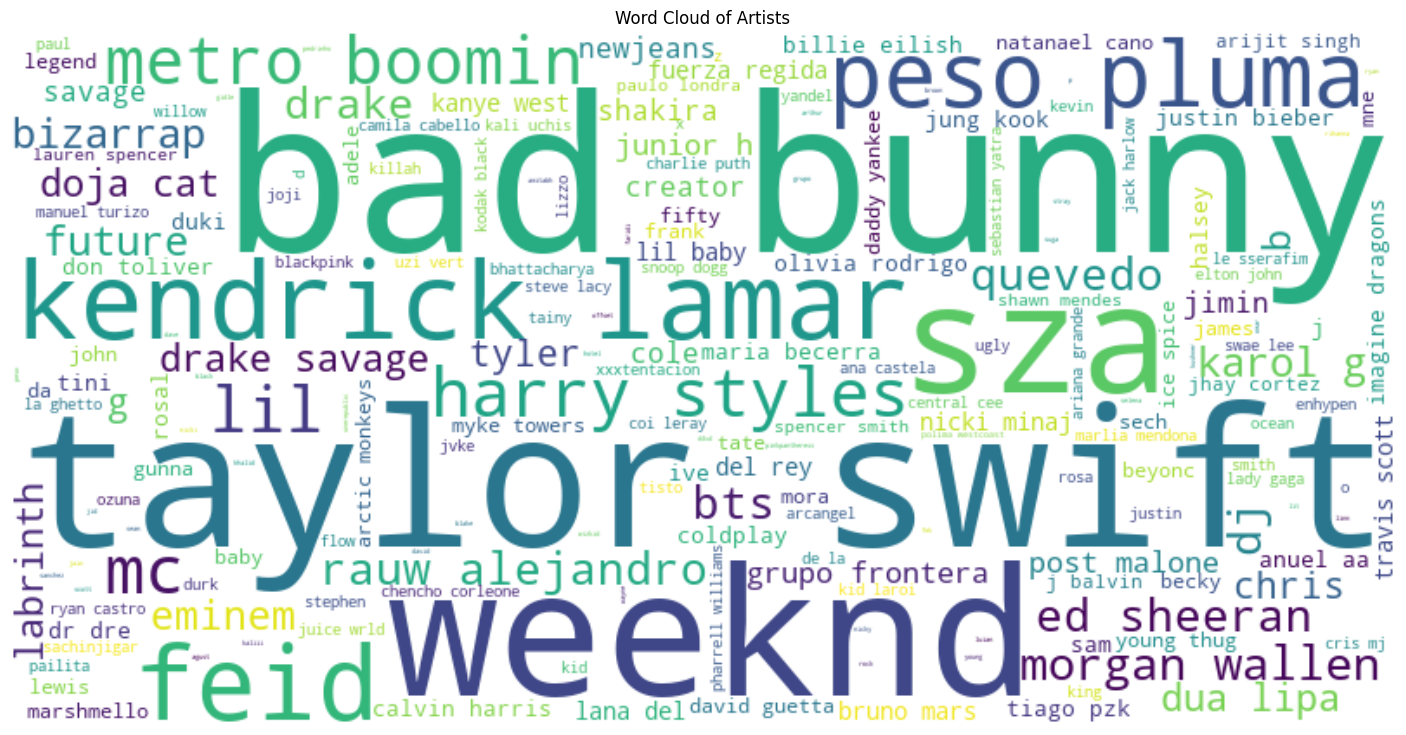

In [23]:
# Separating all artist names by spaces
artists_text = ' '.join(cleaned_artists)

# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='viridis', collocations=True).generate(artists_text)

# Plotting the WordCloud image
plt.figure(figsize=(20, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Artists')
plt.show()

###### Most Common Words in Track Name

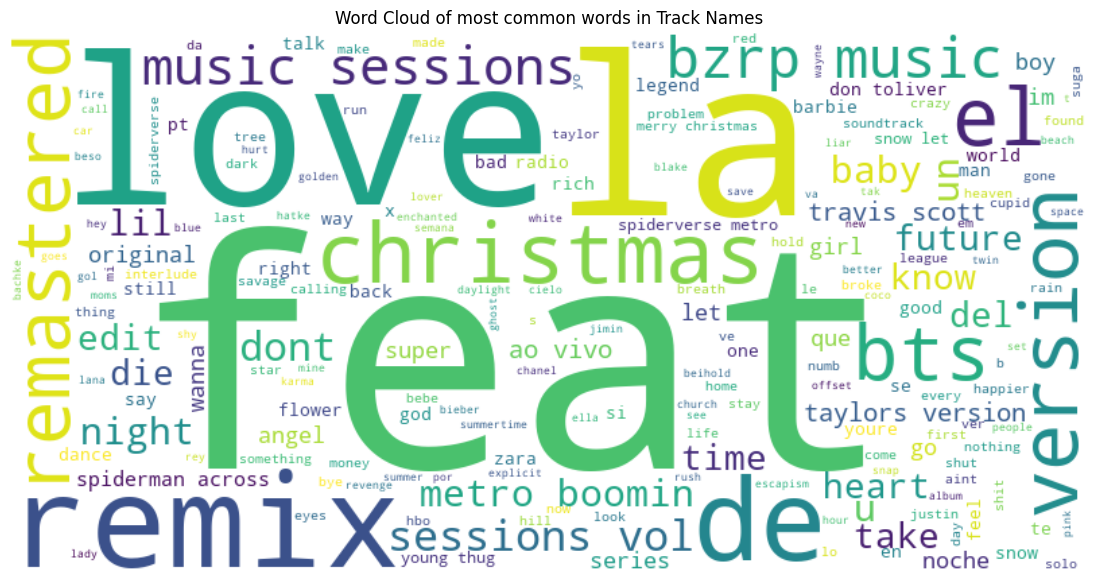

In [24]:
# Extracting 'track_name' column into a list
track_names = df['track_name'].tolist()

# Converting track names to lowercase
cleaned_track_names = [re.sub(r'[^a-zA-Z\s]', '', track.lower()) for track in track_names]

# Combining track names into a single string
track_names_text = ' '.join(cleaned_track_names)

# Generating word cloud of track names
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(track_names_text)

# Plotting WordCloud image
plt.figure(figsize=(20, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of most common words in Track Names')
plt.show()

### d. Audio Features Analysis

###### How are different audio features related to each other?

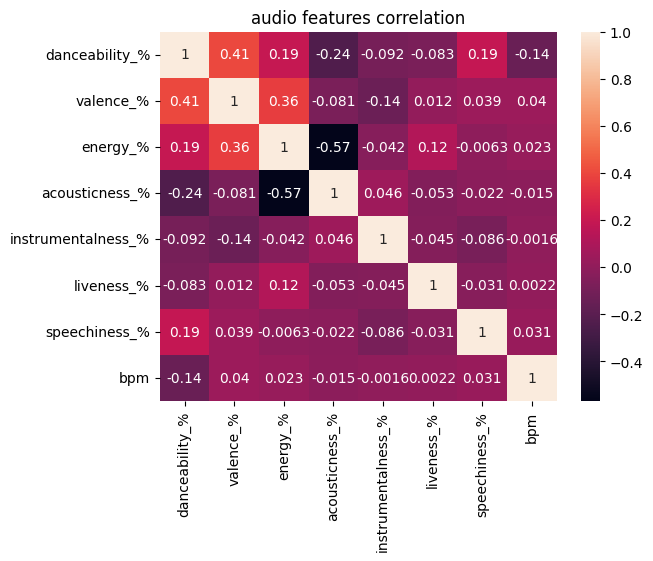

In [25]:
feature_columns = ["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%", 'bpm']
feature_matrix = df[feature_columns].corr()
sns.heatmap(feature_matrix,annot = True)
plt.title("audio features correlation")
plt.show()

Energy and acousticness don't go well together and are negativel correlated valenece and danceability have a good postive correlation with each other

###### Audio Feature Distribution 

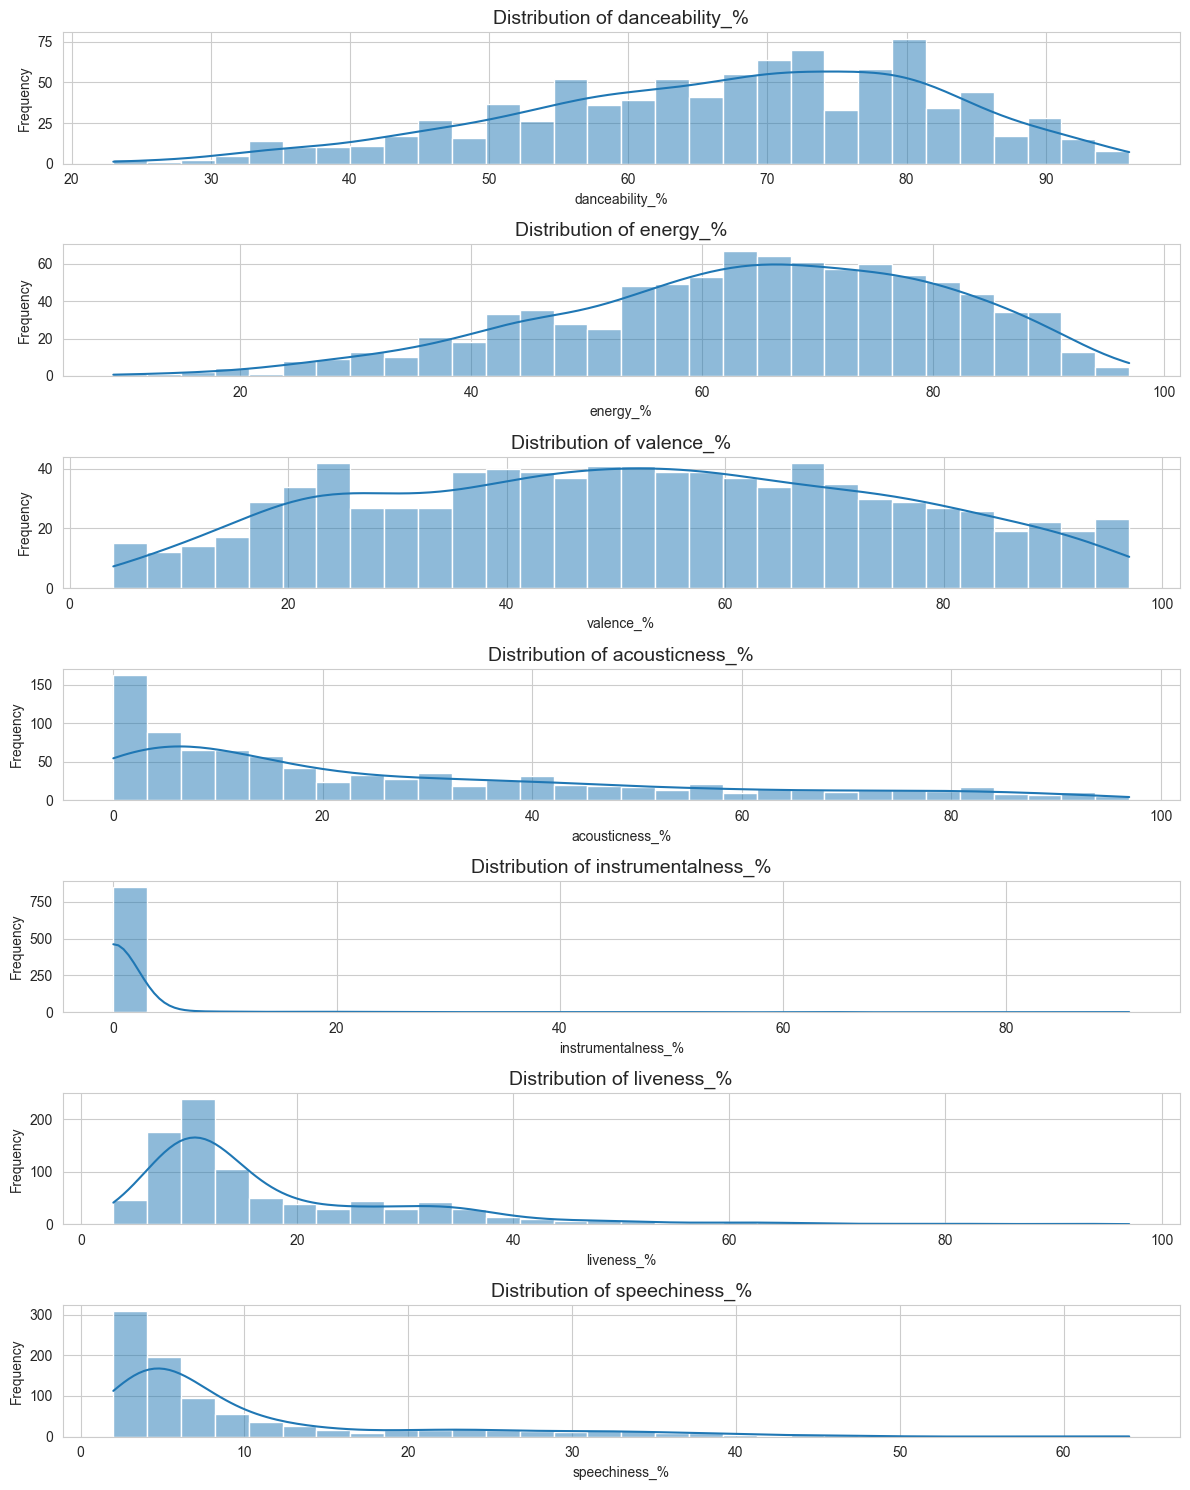

In [26]:
sns.set_style("whitegrid")

# Creating a list of features to visualize
features_to_visualize = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(nrows=len(features_to_visualize), figsize=(12, 15))

# Plotting the distribution for each feature
for i, feature in enumerate(features_to_visualize):
    sns.histplot(df[feature], ax=axes[i], bins=30, kde=True)
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms illustrate the distribution of various audio features of songs, with most songs showing moderate to high danceability, energy, and valence, while acousticness, instrumentalness, liveness, and speechiness are skewed towards lower values, indicating a prevalence of more energetic and rhythmic content in this spotify dataset.

###### Plotting a scatter plot of different audio features with the number of streams a song gets and find their correlation

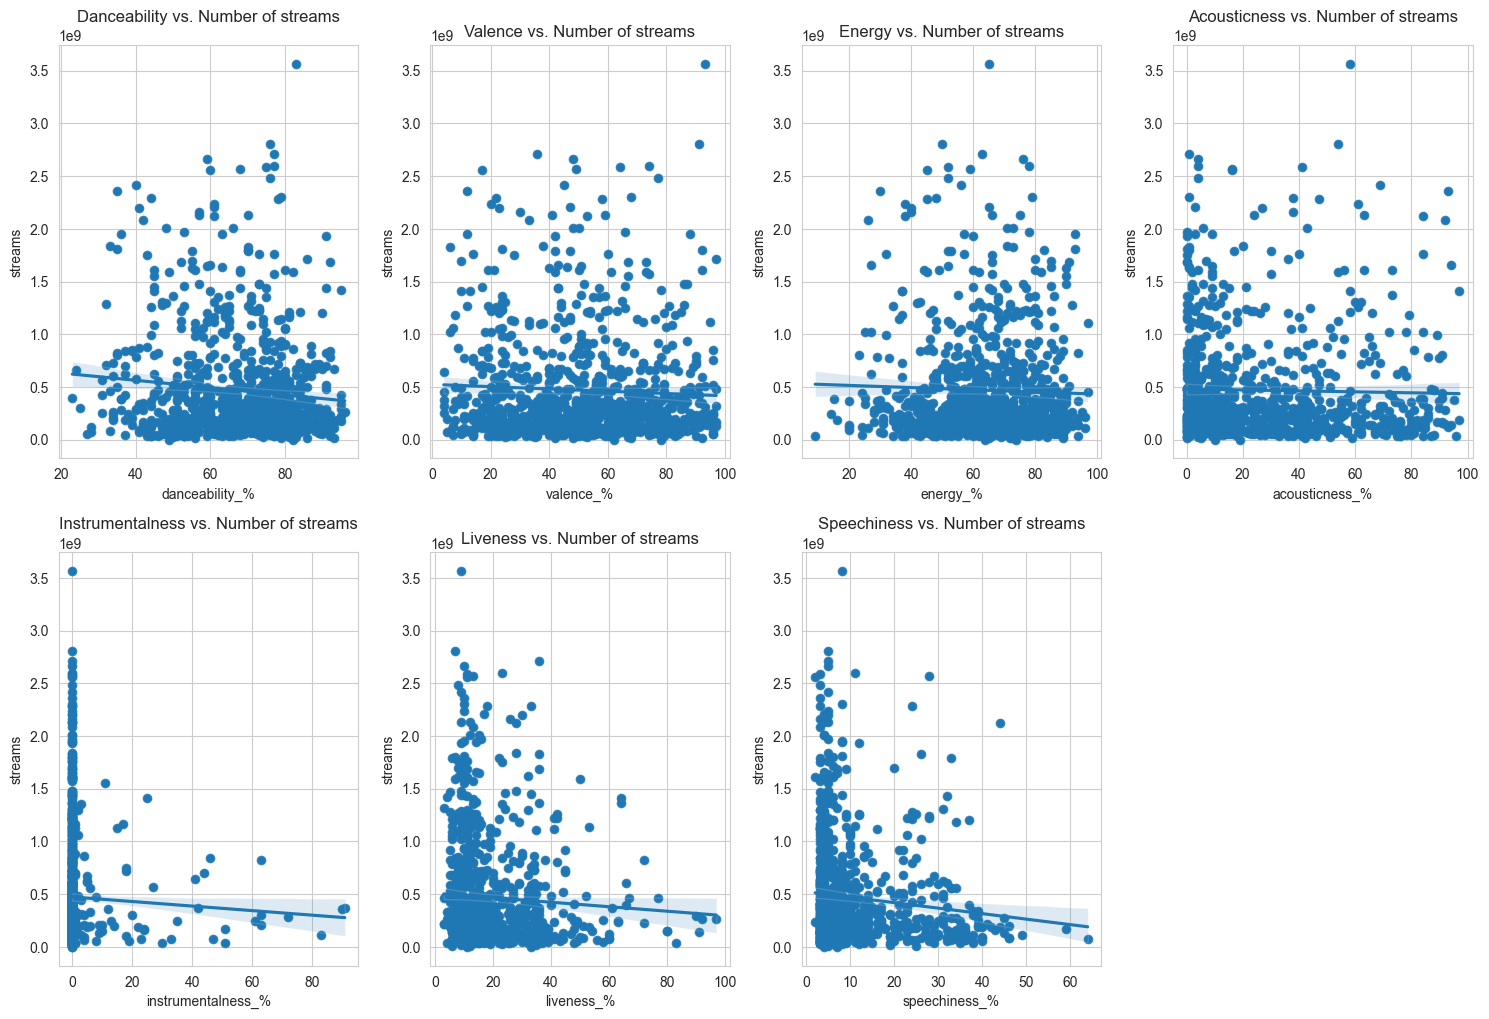

In [27]:
plt.figure(figsize=(15,20))

for i, feature in enumerate(feature_columns[:len(feature_columns)-1], start=1):
    plt.subplot(4,4, i)
    plt.title(feature.replace("_%","").capitalize() + " vs. Number of streams")
    plt.ylabel('Streams (in billions)')
    plt.xlabel(feature.replace("_%","").capitalize())
    sns.scatterplot(x=df[feature], y=df['streams'])
    sns.regplot(x=df[feature], y=df['streams'])
    
plt.tight_layout()

Speechiness and streams are negatively correlated instrumentalness and streams are negatively correlated

### e. Exploring Beats per Minute

###### In what range should be the beats per minute of a song the song would have the most number of streams?

C:\Users\sanja\AppData\Local\Temp\ipykernel_36096\772480666.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




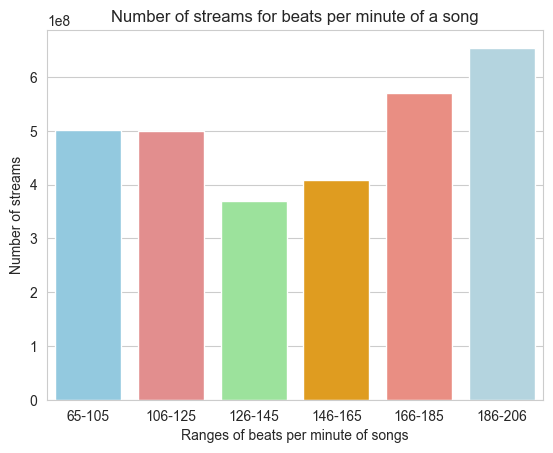

In [28]:
values_bpm = [
    df.loc[(df["bpm"] >= 65) & (df["bpm"] <= 105)]["streams"].mean(),
    df.loc[(df["bpm"] >= 106) & (df["bpm"] <= 125)]["streams"].mean(),
    df.loc[(df["bpm"] >= 126) & (df["bpm"] <= 145)]["streams"].mean(),
    df.loc[(df["bpm"] >= 146) & (df["bpm"] <= 165)]["streams"].mean(),
    df.loc[(df["bpm"] >= 166) & (df["bpm"] <= 185)]["streams"].mean(),
    df.loc[(df["bpm"] >= 186) & (df["bpm"] <= 206)]["streams"].mean(),
]
labels_bpm = ["65-105", "106-125", "126-145", "146-165", "166-185", "186-206"]

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'salmon', 'lightblue']

sns.barplot(x=labels_bpm, y=values_bpm, palette=colors)
plt.title("Number of streams for beats per minute of a song")
plt.xlabel("Ranges of beats per minute of songs")
plt.ylabel("Number of streams")
plt.show()


The songs with bpm in the range of 186-206 have the most number of streams
The songs with bpm in the range of 126-145 have the least number of streams

###### How does the beats per minute of a song affect other audio features?

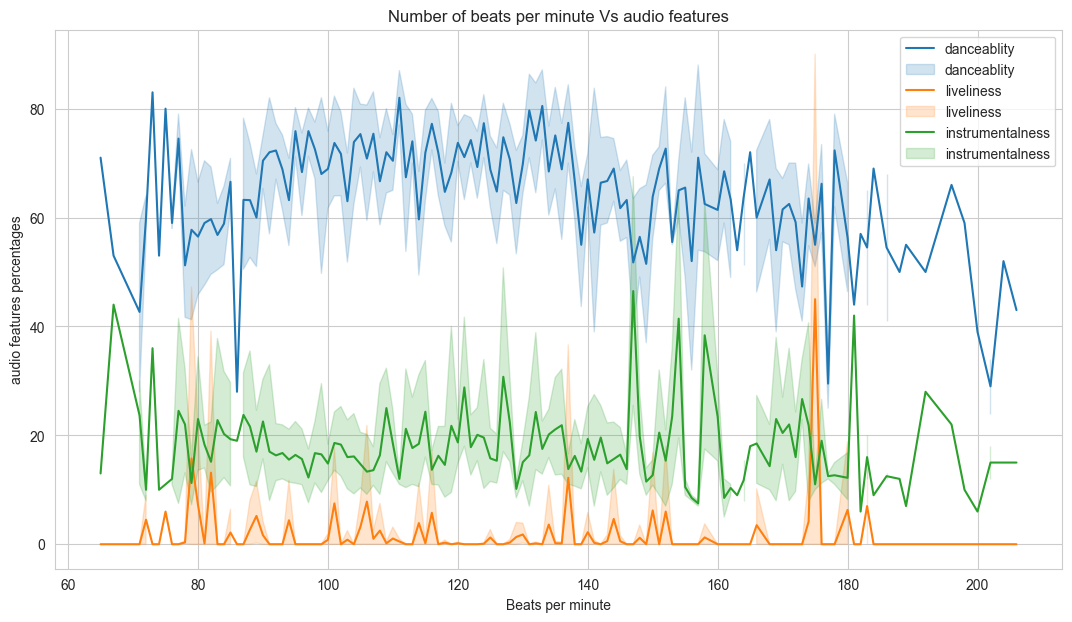

In [29]:
# Plotting Beats per minute vs audio features
plt.figure(figsize=(13,7))
plt.title("Number of beats per minute Vs audio features")
plt.xlabel("Beats per minute")
plt.ylabel("audio features percentages")
sns.lineplot(x=df["bpm"].tolist(),y=df["danceability_%"].tolist())
sns.lineplot(x=df["bpm"].tolist(),y=df["instrumentalness_%"].tolist())
sns.lineplot(x=df["bpm"].tolist(),y=df["liveness_%"].tolist())
plt.legend(["danceablity", "danceablity","liveliness","liveliness","instrumentalness","instrumentalness"], loc ="upper right")
plt.show()

There is a steep increase in the liveliness of a song for bpm around 160-180
There is a steep decrease in the danceablity of a song for bpm aorund 80-100
The instrumentalness of a song is equally distributed among all ranges of bpm

### f. Comparision across platforms

In [30]:
df['in_spotify_playlists']

0       553
1      1474
2      1397
3      7858
4      3133
       ... 
948     953
949    1180
950     573
951    1320
952     782
Name: in_spotify_playlists, Length: 902, dtype: int64

In [31]:
df['in_deezer_playlists']

0       45
1       58
2       91
3      125
4       87
      ... 
948     37
949      8
950      7
951     17
952     32
Name: in_deezer_playlists, Length: 902, dtype: object

In [32]:
total_tracks = len(df)

In [33]:
# Converting presence indicator columns to numeric type (if not already)
presence_columns = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists',
                    'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']

In [34]:
# Converting 'object' type columns to numeric, handling non-numeric values
for col in presence_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

In [35]:
# Creating a DataFrame for platform presence analysis
platform_presence = {
    'Platform': ['Spotify', 'Apple Music', 'Deezer'],
    'Tracks Presence (%)': [
        (df['in_spotify_playlists'].sum() / total_tracks) * 100,
        (df['in_apple_playlists'].sum() / total_tracks) * 100,
        (df['in_deezer_playlists'].sum() / total_tracks) * 100
    ]
}

platform_presence_df = pd.DataFrame(platform_presence)
platform_presence_df

,Platform,Tracks Presence (%)
0,Spotify,480000.997783
1,Apple Music,6053.658537
2,Deezer,9022.616408


In [36]:
# Plotting the Barplot for comparing the platfoems

fig = go.Figure()
fig.add_trace(go.Bar(
    x=platform_presence_df['Platform'],
    y=platform_presence_df['Tracks Presence (%)'],
    name='Tracks',
    marker_color='skyblue',
    hoverinfo='y+name',
    hovertemplate='Platform: %{x}<br>Tracks Presence: %{y:.2f}%<extra></extra>'
))

# Update the layout of the figure
fig.update_layout(
    title='Platform Presence Analysis',
    xaxis_title='Platform',
    yaxis_title='Presence (%)',
    barmode='group',
    legend_title='Presence Type'
)

# Display the figure in a Jupyter notebook or other Python GUI
fig.show()

The bar chart demonstrates a significant disparity in song presence across different platforms, with Spotify leading by a substantial margin followed by Apple Music, while Deezer shows a relatively minimal presence.

In [37]:
# Identifying top 10 songs for Spotify based on their presence in playlists and charts
top_songs_spotify = df[['track_name', 'artist_name', 'in_spotify_playlists', 'in_spotify_charts']]
top_songs_spotify['spotify_total'] = top_songs_spotify['in_spotify_playlists'] + top_songs_spotify['in_spotify_charts']
top_songs_spotify = top_songs_spotify.sort_values(by='spotify_total', ascending=False).head(10)

# Identifying top 10 songs for Apple Music based on their presence in playlists and charts
top_songs_apple = df[['track_name', 'artist_name', 'in_apple_playlists', 'in_apple_charts']]
top_songs_apple['apple_total'] = top_songs_apple['in_apple_playlists'] + top_songs_apple['in_apple_charts']
top_songs_apple = top_songs_apple.sort_values(by='apple_total', ascending=False).head(10)


C:\Users\sanja\AppData\Local\Temp\ipykernel_36096\796408929.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sanja\AppData\Local\Temp\ipykernel_36096\796408929.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
top_songs_spotify

,track_name,artist_name,in_spotify_playlists,in_spotify_charts,spotify_total
757,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",52898,0,52898
630,Mr. Brightside,The Killers,51979,15,51994
720,Wake Me Up - Radio Edit,Avicii,50887,34,50921
624,Smells Like Teen Spirit - Remastered 2021,Nirvana,49991,9,50000
199,Take On Me,a-ha,44927,17,44944
162,One Dance,"Drake, WizKid, Kyla",43257,24,43281
114,Everybody Wants To Rule The World,Tears For Fears,41751,25,41776
871,Sweet Child O' Mine,Guns N' Roses,41231,1,41232
717,Bohemian Rhapsody - Remastered 2011,Queen,40112,3,40115
168,We Found Love,"Rihanna, Calvin Harris",36843,21,36864


In [39]:
top_songs_apple

,track_name,artist_name,in_apple_playlists,in_apple_charts,apple_total
407,Don't Start Now,Dua Lipa,532,77,609
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",492,99,591
162,One Dance,"Drake, WizKid, Kyla",433,107,540
724,Something Just Like This,"The Chainsmokers, Coldplay",336,188,524
634,Shallow,"Lady Gaga, Bradley Cooper",368,155,523
106,Cold Heart - PNAU Remix,"Dua Lipa, Elton John, Pnau",384,135,519
12,Flowers,Miley Cyrus,300,215,515
693,Seï¿½ï¿½o,"Shawn Mendes, Camila Cabello",453,50,503
685,Thinking Out Loud,Ed Sheeran,363,129,492
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",372,117,489


In [40]:
# Creating subplots with shared y-axis
fig = make_subplots(rows=2, cols=1, shared_yaxes=True, subplot_titles=("Top 10 Songs on Spotify", "Top 10 Songs on Apple Music"))

# Spotify data
fig.add_trace(go.Bar(x=top_songs_spotify['spotify_total'], y=top_songs_spotify['track_name'] + " (" + top_songs_spotify['artist_name'] + ")",
                     orientation='h', marker=dict(color='blue'), name='Spotify'), row=1, col=1)

# Apple Music data
fig.add_trace(go.Bar(x=top_songs_apple['apple_total'], y=top_songs_apple['track_name'] + " (" + top_songs_apple['artist_name'] + ")",
                     orientation='h', marker=dict(color='green'), name='Apple Music'), row=2, col=1)

# Updating layout
fig.update_layout(title="Top 10 Songs on Spotify and Apple Music Based on Presence in Playlists/Charts",
                  xaxis=dict(title='Total Presence'), height=1000)

# Updating axis titles
fig.update_xaxes(title_text="Total Presence", row=1, col=1)
fig.update_yaxes(title_text="Track (Artist)", row=1, col=1)
fig.update_xaxes(title_text="Total Presence", row=2, col=1)
fig.update_yaxes(title_text="Track (Artist)", row=2, col=1)

fig.show()



## 4. Feature Engineering 

### a. Distribution of Songs by Mode

###### The 'mode_Major' and 'mode_Minor' refers to the tonality or scale of a piece of music
- "mode_Major" corresponds to the major scale, characterized by a bright and uplifting sound
- "mode_Minor" corresponds to the minor scale, known for its more melancholic and somber qualities

In [41]:
# Calculating the number of songs with 'mode_major' and 'mode_minor'
major_count = df['mode_Major'].sum()
minor_count = df['mode_Minor'].sum()

# Calculating the total number of songs
total_songs = len(df)

# Calculating the percentage of songs with 'mode_major' and 'mode_minor'
major_percentage = (major_count / total_songs) * 100
minor_percentage = (minor_count / total_songs) * 100

#Plotting an interactive pie chart
labels = ['Mode Major', 'Mode Minor']
sizes = [major_percentage, minor_percentage] 
colors = ['purple', 'lightcoral']

fig = px.pie(values=sizes, names=labels, title='Distribution of Songs by Mode',
             color_discrete_sequence=colors, 
             hole=0.4)  

# Making one of the slices stand out
fig.update_traces(textinfo='percent+label', pull=[0, 0.05]) 

# Updating layout
fig.update_layout(
    showlegend=True,
    annotations=[dict(text='Mode of Songs', x=0.5, y=0.5, font_size=12, showarrow=False)]
)

fig.show()

### b. Collaboration of artists for songs 

###### First, we divide the songs into two categories :
   - Solo : If a song has only one artist (i.e., 'artist_count' equals 1), it's categorized as 'solo', indicating a solo performance.
   - Colab : If there are multiple artists (i.e., 'artist_count' greater than 1), it's categorized as 'colab', indicating a collaboration between multiple artists.

Adding a column to categorize songs by 'solo' and 'colab'

In [42]:
df['artist_type']=df['artist_count'].apply(lambda x : 'solo' if x==1 else 'colab')
df.head()

,track_name,artist_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,mode_Major,mode_Minor,artist_type
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,...,89,83,31,0,8,4,2023-07-14,True,False,colab
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,...,61,74,7,0,10,4,2023-03-23,True,False,solo
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,...,32,53,17,0,31,6,2023-06-30,True,False,solo
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,...,58,72,11,0,11,15,2019-08-23,True,False,solo
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,...,23,80,14,63,11,6,2023-05-18,False,True,solo


In [43]:
# Retrieving the unique values of the 'artist_count' column
unique_arr = df["artist_count"].unique()
unique_arr

array([2, 1, 3, 8, 4, 5, 6, 7], dtype=int64)

In [44]:
# Plotting the distribution of number of artists in each song
pie_arr = []
for i in unique_arr:
    pie_arr.append(df.loc[df["artist_count"] == i]["artist_count"].sum().tolist())

# Defining labels
labels = unique_arr
explode = [0.05, 0, 0.05, 0.2, 0.2, 0.2, 0.2, 0.2]

fig = go.Figure(data=[go.Pie(labels=labels, values=pie_arr, hole=0.3, pull=[0.1 if exp != 0 else 0 for exp in explode])])

fig.update_layout(title="Distribution of Number of Artists in Each Song", legend_title="Number of Artists",)
fig.show()

###### Does the number of artists in a song correspond to the number of streams it may get?

In [45]:
# Calculating the average number of streams for each number of artists in a song
values_NoArtists = []
for i in unique_arr:
    values_NoArtists.append(df.loc[df["artist_count"]==i]["streams"].mean())

# Plotting the graph
fig = go.Figure(data=[go.Bar(x=unique_arr, y=values_NoArtists)])

fig.update_layout(title="Number of Streams vs Number of Artists in a Song",
                  xaxis_title="Number of Artists",
                  yaxis_title="Number of Streams")

As we can see, the number of artists increases in a song the number of steams it may get decreases
There is a downward trend.

However in a song with 7 artists has greater streams than the streams of songs with number of artists as 4
We took the mean of the data because most songs have only 1 or 2 artists and that would be unfair for songs with more artists

###### Selecting the top 5 most streamed songs with artist collaboration

In [46]:
# Selecting the top 5 most streamed songs with artist collaboration
top_colab_songs = df[df['artist_count']>1].sort_values('streams', ascending = False)[['track_name','streams']].head()

# Plotting the dashboard
fig = go.Figure(data=[go.Bar(x=top_colab_songs['track_name'], y=top_colab_songs['streams'])])

fig.update_layout(title='The Top 5 Most Streamed Songs Artist Collab',
                  xaxis_title='The Tracks Titles',
                  yaxis_title='Stream Count',
                  xaxis_tickangle=-45)

fig.show()

###### Centrality Measure

###### Calculating a centrality measure based on the artist collaboration network for top 10 collaborated artist, where artists with more collaborations have higher centrality scores.

In [47]:
import networkx as nx

# Create a graph representing the collaboration network
collaboration_graph = nx.Graph()

# Add edges between artists who have collaborated
for index, row in df.iterrows():
    collaborators = row['artist_name'].split(',')  # assuming 'collaborators' is a column containing artist names
    for collaborator in collaborators:
        collaboration_graph.add_edge(row['artist_name'], collaborator.strip())

# Calculate the degree centrality for top 10 collaboration artist
degree_centrality = nx.degree_centrality(collaboration_graph)

# Get the top 10 artists based on centrality measure
top_10_artists = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert the top 10 artists to a DataFrame
top_10_df = pd.DataFrame(top_10_artists, columns=['artist_name', 'centrality'])

# Display the top 10 centrality for visualization
print(top_10_df)


      artist_name  centrality
0       Bad Bunny    0.021127
1      Peso Pluma    0.015091
2            Feid    0.014085
3      The Weeknd    0.014085
4    Metro Boomin    0.014085
5  Kendrick Lamar    0.013078
6  Rauw Alejandro    0.011066
7         Quevedo    0.010060
8          Future    0.010060
9           Drake    0.010060


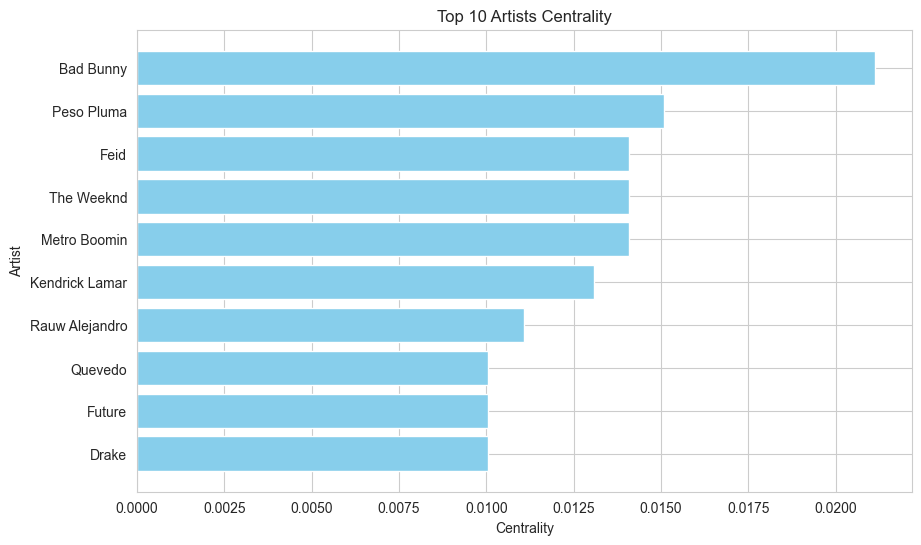

In [48]:
# Visualize the centrality measures of top 10 artists using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_df['artist_name'], top_10_df['centrality'], color='skyblue')
plt.xlabel('Centrality')
plt.ylabel('Artist')
plt.title('Top 10 Artists Centrality')
plt.gca().invert_yaxis()  # invert y-axis to have the highest centrality at the top
plt.show()

### c. Temporal Analysis

###### Temporal analysis : 
  - It involves the examination and interpretation of data over time. 
  - It aims to understand patterns, trends, and changes in data that occur over different time intervals

###### Number of Song Releases through Years

In [49]:
#Extracting year from 'released_date' column
df['release_year'] = df['released_date'].dt.year

# Grouping by year and counting the number of releases in each year
release_counts = df['release_year'].value_counts().sort_index()
release_counts

release_year
1930      1
1942      1
1946      1
1950      1
1952      1
1957      1
1958      2
1959      2
1963      3
1968      1
1970      1
1971      1
1973      1
1975      2
1979      1
1982      2
1983      1
1984      3
1985      2
1986      2
1987      1
1991      2
1992      1
1995      1
1996      1
1997      1
1998      1
1999      5
2000      4
2002      6
2003      2
2004      4
2005      1
2007      1
2008      2
2010      7
2011      9
2012      7
2013     12
2014     12
2015     10
2016     17
2017     21
2018      9
2019     29
2020     30
2021    103
2022    398
2023    175
Name: count, dtype: int64

#### Number of Song Releases by Year (2010 - 2023)

In [50]:
# Filtering years 2010 to 2023
release_counts_filtered = release_counts.loc['2010':'2023']

fig = go.Figure(data=[go.Bar(x=release_counts_filtered.index, y=release_counts_filtered.values, marker_color='purple')])
fig.update_layout(title='Number of Song Releases by Year (2010 - 2023)',
                  xaxis_title='Year',
                  yaxis_title='Number of Releases',
                  xaxis_tickangle=-45,
                  yaxis=dict(gridcolor='lightgrey'),
                  plot_bgcolor='white')
fig.show()

#### Calculating yearly averages for streams, danceability, and energy

In [51]:
df.head()

,track_name,artist_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,mode_Major,mode_Minor,artist_type,release_year
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,...,83,31,0,8,4,2023-07-14,True,False,colab,2023
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,...,74,7,0,10,4,2023-03-23,True,False,solo,2023
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,...,53,17,0,31,6,2023-06-30,True,False,solo,2023
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,...,72,11,0,11,15,2019-08-23,True,False,solo,2019
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,...,80,14,63,11,6,2023-05-18,False,True,solo,2023


In [52]:
yearly_averages = df.groupby(df['released_date'].dt.year)[['streams', 'danceability_%', 'energy_%']].mean()

In [53]:
# Calculating yearly averages for streams, danceability, and energy

fig = make_subplots(rows=3, cols=1, subplot_titles=('Yearly Trend in Average Streams', 'Yearly Trend in Average Danceability', 'Yearly Trend in Average Energy'))

# Adding traces for each metric
fig.add_trace(go.Scatter(x=yearly_averages.index, y=yearly_averages['streams'], mode='lines+markers', name='Average Streams', marker=dict(color='teal')), row=1, col=1)
fig.add_trace(go.Scatter(x=yearly_averages.index, y=yearly_averages['danceability_%'], mode='lines+markers', name='Average Danceability', marker=dict(color='purple')), row=2, col=1)
fig.add_trace(go.Scatter(x=yearly_averages.index, y=yearly_averages['energy_%'], mode='lines+markers', name='Average Energy', marker=dict(color='orange')), row=3, col=1)

# Updating layout of dashboard
fig.update_layout(title='Yearly Trends in Average Streams, Danceability, and Energy',
                  xaxis_title='Year',
                  height=1000)

# Updating titles of subplot
fig.update_yaxes(title_text='Average Streams', row=1, col=1)
fig.update_yaxes(title_text='Average Danceability (%)', row=2, col=1)
fig.update_yaxes(title_text='Average Energy (%)', row=3, col=1)

fig.show()


The set of line graphs displays fluctuations in average streams, danceability, and energy of music over the years, revealing an overall trend of increased danceability and energy in recent decades, alongside notable variability in streaming counts.

### d. Populatity based on streams

Handling the Skewed Data & Checking the descriptive statistics for streams

In [54]:
# Getting descriptive statistics for 'streams'
stream_stats = df['streams'].describe()
print(stream_stats)

count    9.020000e+02
mean     4.692324e+08
std      5.198065e+08
min      2.762000e+03
25%      1.367662e+08
50%      2.697280e+08
75%      5.988657e+08
max      3.562544e+09
Name: streams, dtype: float64


Log Transformation: Given the large range of your data, a log transformation can be particularly useful. This transformation helps in stabilizing the variance and normalizing the data.

In [55]:
# Applying log transformation to 'streams' to reduce skewness
df['log_streams'] = np.log1p(df['streams'])

Being more normalized, suggests a bell-curve distribution where most of the songs have streams falling around the mean.

Plotting the skewed  streams

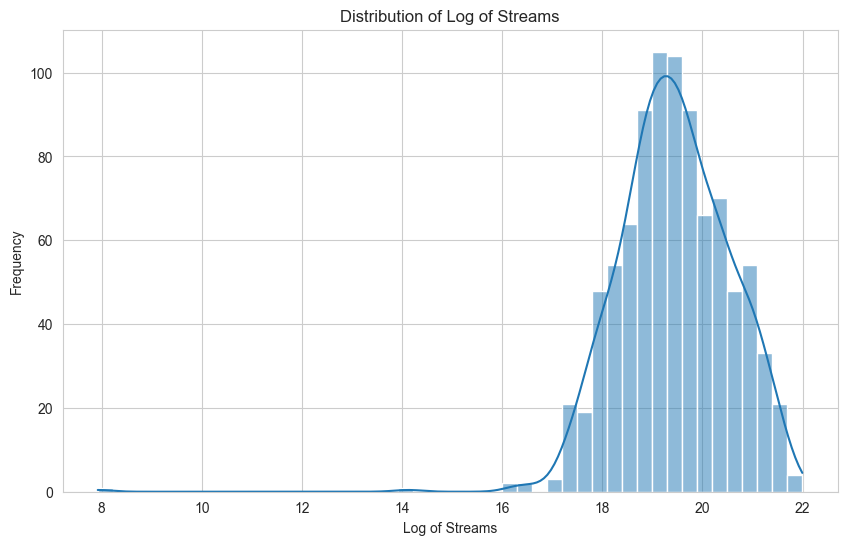

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['log_streams'], kde=True)
plt.title('Distribution of Log of Streams')
plt.xlabel('Log of Streams')
plt.ylabel('Frequency')
plt.show()

Data is normally distributed (as indicated by the transformation), so we can utilize the mean and standard deviation to categorize the songs.

In [57]:
def categorize_by_std(x, mean, std):
    if x < (mean - std):
        return 'Low'
    elif x < mean:
        return 'Below Average'
    elif x < (mean + std):
        return 'Above Average'
    else:
        return 'High'

# Mean and STD of streams
mean_log_streams = 19.433271
std_log_streams = 1.123427

# Applying categorization based on standard deviation
df['popularity_by_std'] = df['log_streams'].apply(lambda x: categorize_by_std(x, mean_log_streams, std_log_streams))

# Creating a count of categories
category_counts = df['popularity_by_std'].value_counts().reindex(['Low', 'Below Average', 'Above Average', 'High'])

# Plotting bar chart using Plotly Express
fig = px.bar(x=category_counts.index, y=category_counts.values, 
             labels={'x': 'Popularity Category', 'y': 'Number of Songs'}, 
             title='Popularity Distribution ')
fig.update_traces(hovertemplate='Category: %{x}<br>Number of Songs: %{y}')
fig.show()



The bar chart displays a popularity distribution where the majority of songs fall into the 'Below Average' category, with significantly fewer songs classified as 'Low' or 'High' in popularity.

# Model Developement

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902 entries, 0 to 952
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            902 non-null    object        
 1   artist_name           902 non-null    object        
 2   artist_count          902 non-null    int64         
 3   in_spotify_playlists  902 non-null    int32         
 4   in_spotify_charts     902 non-null    int32         
 5   streams               902 non-null    int64         
 6   in_apple_playlists    902 non-null    int32         
 7   in_apple_charts       902 non-null    int32         
 8   in_deezer_playlists   902 non-null    int32         
 9   in_deezer_charts      902 non-null    int32         
 10  in_shazam_charts      902 non-null    object        
 11  bpm                   902 non-null    int64         
 12  key                   902 non-null    float64       
 13  danceability_%        902

In [59]:
#first we need to drop non-required independent variable columns
# keeping ['artist_count', 'release_year', 'in_spotify_playlists','in_spotify_charts', 'in_apple_playlists', 'in_apple_charts','in_deezer_playlists', 'in_deezer_charts']


df1 = df
# Now, convert the 'streams' column to numeric
df1['streams'] = pd.to_numeric(df1['streams'], errors='coerce')

# Converting 'streams' to millions with rounding
#df['streams'] = (df['streams'] / 100000).round(3)

# Listing of columns to keep
columns_to_keep = ['artist_count', 'release_year', 'in_spotify_playlists', 'in_spotify_charts',
                   'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', "danceability_%","speechiness_%",'valence_%', 'energy_%', 'instrumentalness_%', 'liveness_%',"streams"]

# Creating a new DataFrame with the selected columns
df = df1[columns_to_keep] # Make a copy to avoid the SettingWithCopyWarning



     

Preparing the data and applying the machine learning models Random Forest Regression, Gradient Boosting Regression & K-Nearest Neighbors Regression

In [60]:
# Features (X) and Target variable (y)
X = df.drop('streams', axis=1)
y = df['streams']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate models
def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')


In [61]:
# Standardize features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
    
evaluate_model('K-Nearest Neighbors', y_test, knn_pred)

K-Nearest Neighbors - Mean Squared Error: 111315473752314656.00, R-squared: 0.57


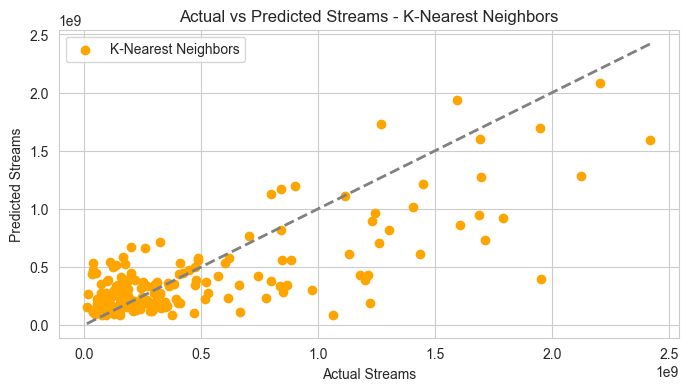

In [62]:
# Plot actual vs predicted for K-Nearest Neighbors
plt.figure(figsize=(8, 4))
plt.scatter(y_test, knn_pred, color='orange', label='K-Nearest Neighbors')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs Predicted Streams - K-Nearest Neighbors')
plt.legend()
plt.show()

This scatter plot for the K-Nearest Neighbors model illustrates a trend where the predicted Spotify streams often fall short of the actual streams, particularly for songs with higher stream counts. As the actual stream numbers rise, the predictions don't keep up, suggesting that this model may not be capturing all the factors that lead to a song's popularity on the platform.

In [63]:
# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

evaluate_model('Random Forest', y_test, rf_pred)

Random Forest - Mean Squared Error: 58221514410516128.00, R-squared: 0.78


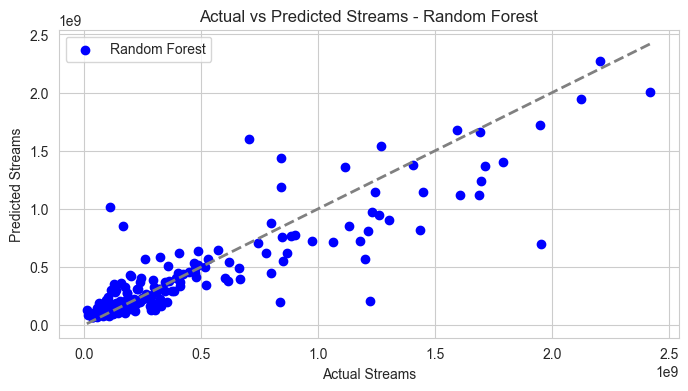

In [64]:
# Plot actual vs predicted for Random Forest
plt.figure(figsize=(8, 4))
plt.scatter(y_test, rf_pred, color='blue', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs Predicted Streams - Random Forest')
plt.legend()
plt.show()

This scatter plot for the Random Forest model shows that predictions for Spotify stream counts are more accurate and consistent across the full range of actual stream numbers. The points are clustered closer to the dashed line that represents perfect prediction, particularly for songs with fewer streams, indicating that the Random Forest model captures the patterns in the data well. However, there is still some variance for songs with very high stream counts, which could be an area to focus on for model improvement.

In [65]:
# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

evaluate_model('Gradient Boosting', y_test, gb_pred)

Gradient Boosting - Mean Squared Error: 59819282177984728.00, R-squared: 0.77


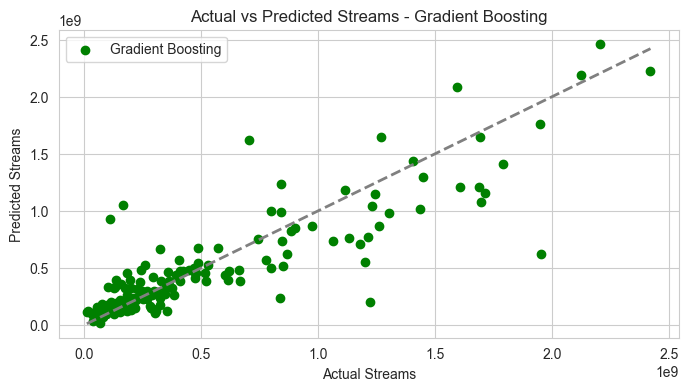

In [66]:
# Plot actual vs predicted for Gradient Boosting
plt.figure(figsize=(8, 4))
plt.scatter(y_test, gb_pred, color='green', label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs Predicted Streams - Gradient Boosting')
plt.legend()
plt.show()

The scatter plot indicates that the Gradient Boosting model performs quite well in predicting Spotify streams, with predictions generally matching up with actual figures, though it seems to slightly overestimate for songs with mid to higher stream counts.

###### Plotting the Residual Plot

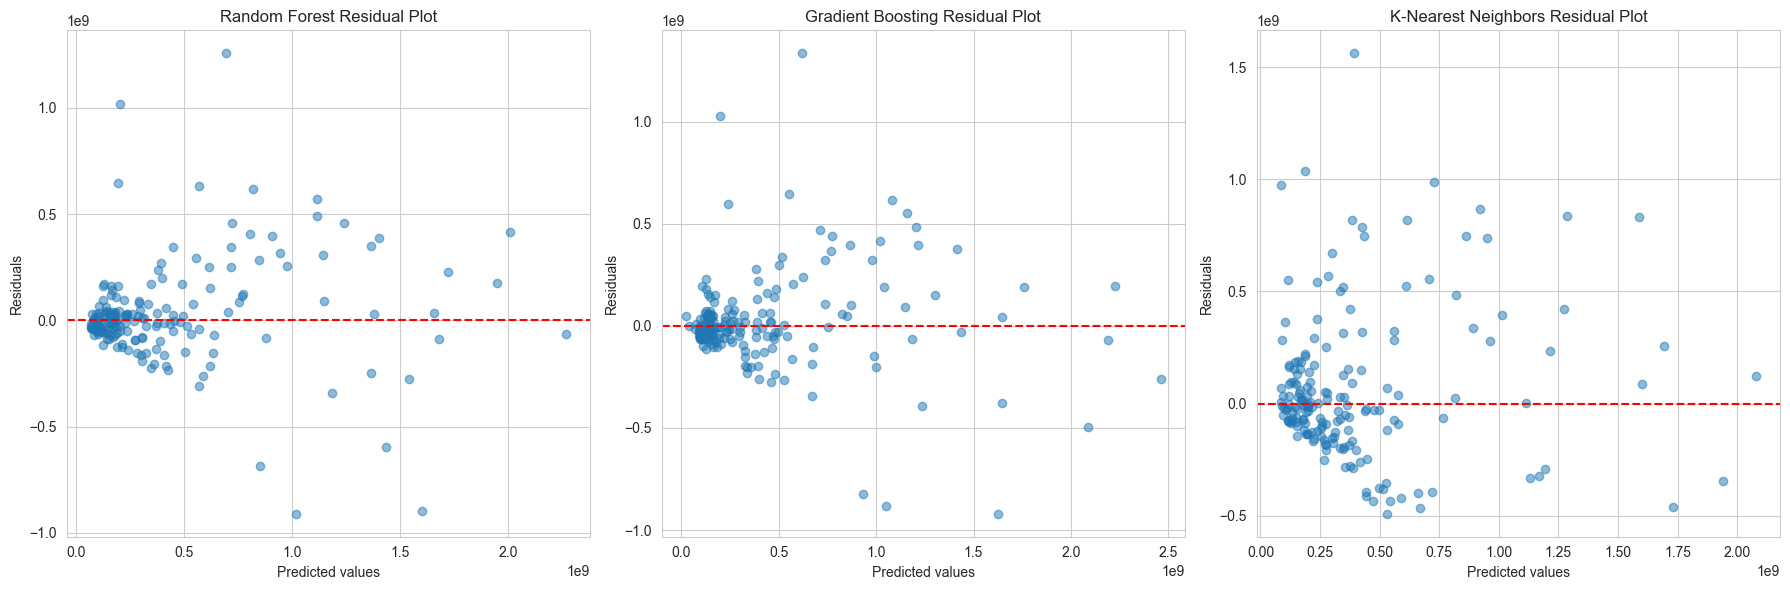

In [67]:
import matplotlib.pyplot as plt

# Calculate residuals for each model
rf_residuals = y_test - rf_pred
gb_residuals = y_test - gb_pred
knn_residuals = y_test - knn_pred

# Plot residual plots
plt.figure(figsize=(18, 6))

# Random Forest Regression
plt.subplot(1, 3, 1)
plt.scatter(rf_pred, rf_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Random Forest Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# Gradient Boosting Regression
plt.subplot(1, 3, 2)
plt.scatter(gb_pred, gb_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gradient Boosting Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# K-Nearest Neighbors Regression
plt.subplot(1, 3, 3)
plt.scatter(knn_pred, knn_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('K-Nearest Neighbors Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


The charts reveal that the Random Forest and Gradient Boosting models are pretty reliable for predicting the number of Spotify streams, with a few misses. The K-Nearest Neighbors, though, tends to be less accurate, struggling especially with the tracks that are either streamed a lot or very little.

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# Features (X) and Target variable (y)
X = df.drop('streams', axis=1)
y = df['streams']

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Calculate and print the mean R-squared score
mean_r2 = cv_scores.mean()
print("Mean R-squared:", mean_r2)
     

Cross-Validation R-squared scores: [0.74147023 0.90085067 0.59230462 0.78599878 0.46400487]
Mean R-squared: 0.6969258353526879


The cross-validation for the Gradient Boosting model shows it explains 70% of the variation in Spotify streams on average, but the performance varies widely with different data subsets, indicating room for model improvement.

###### Model Comparison based on R-squared

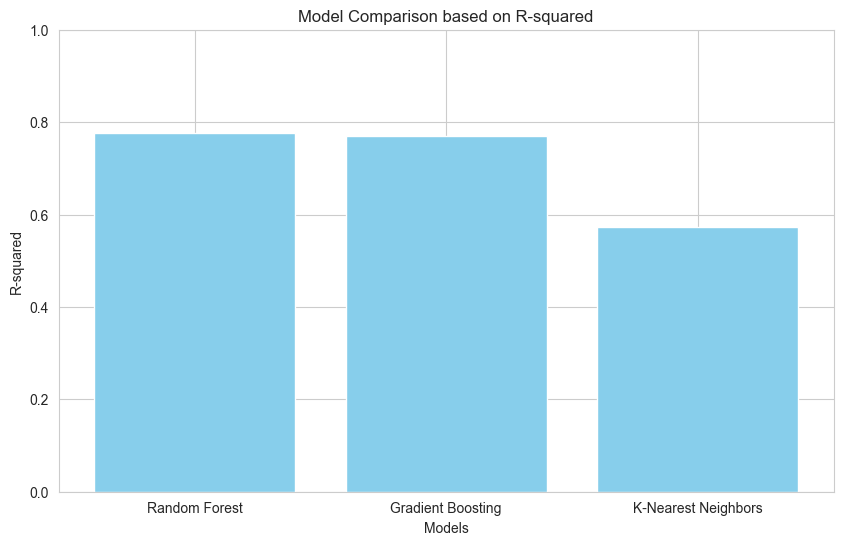

In [69]:
# Model names and corresponding R-squared values
model_names = ['Random Forest', 'Gradient Boosting', 'K-Nearest Neighbors']
r_squared_values = [r2_score(y_test, rf_pred), r2_score(y_test, gb_pred), r2_score(y_test, knn_pred)]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(model_names, r_squared_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Model Comparison based on R-squared')
plt.ylim(0, 1)  # Setting the y-axis limits between 0 and 1
plt.show()


In conclusion, our exploration and analysis of the Spotify dataset have provided us with valuable insights into the factors influencing song streams. We have seen that certain features, such as artist count and audio characteristics like danceability and energy, play a significant role in a track's popularity. Our comparative analysis of machine learning models—Random Forest, Gradient Boosting, and K-Nearest Neighbors—highlighted that the Random Forest and Gradient Boosting models are quite adept at predicting stream counts, with Gradient Boosting having room for improvement based on cross-validation results.
Moving forward, it would be beneficial to delve deeper into feature engineering and model tuning to further refine our predictions and uncover the nuances that make a song a hit on Spotify. By continuing to evolve our model with new data and perhaps integrating additional factors such as marketing efforts or social media influence, we can aim to enhance our understanding of the ever-changing landscape of music streaming success.